# Configure Settings

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pytz
import collections

In [2]:
# configure DataFrame display settings
pd.options.display.max_columns = None

# Load the Pre-processed Data

The pre-processed data file is too large to store on github.  The file is created, stored, and loaded locally on my machine during my analysis.  

Anyone else using this code should download a copy of the data file from my google drive.  A backup copy of the pre-processed data file (version uploaded on 1/21/2019), as well as copies of the input weather and flight data files, can be downloaded here: https://drive.google.com/open?id=1PkbeFC4E2Vea67YqzfooeZacI9eKd9-P  
Note that, after downloading the pre-processed data file, the filepath should be updated in the code below.

In [3]:
# set the input directory
dir_in = 'C:/Users/Jonathon.Poage/Desktop/Springboard/Capstone_Documentation/Project_1/Data_Files/preprocessed_data/'

# set the input filepath
filename_in = 'merged_flight_weather_data_preprocessed.csv'
filepath_in = dir_in + filename_in

In [4]:
# columns to parse as dates
ts_cols_in = ['crs_dep_ts',
              'dep_ts',
              'wheels_off_ts',
              'valid']

# set dtype for each column
dict_dtype_in = {'QUARTER':np.int8,
                 'OP_UNIQUE_CARRIER':'category',
                 'OP_CARRIER_FL_NUM':np.int16,
                 'ORIGIN':'category',
                 'DEST':'category',
                 'DEP_TIME_BLK':'category',
                 'origin_timezone':'category',
                 'station':'category',
                 'skyc1':'category',
                 'skyc2':'category',
                 'skyc3':'category',
                 'skyc4':'category',
                 'skyl1':np.float64,
                 'skyl2':np.float64,
                 'skyl3':np.float64,
                 'skyl4':np.float64,
                 'wxcodes':'category',
                 'station_timezone':'category'}

In [5]:
# load the data -- should take about 1 minute
df = pd.read_csv(filepath_in,
                 parse_dates=ts_cols_in,
                 dtype=dict_dtype_in,
                 low_memory=False)

# Examine the Data and Glean Insights

The DataFrame of flight and weather data is examined in this analysis.  The data is explored in sections 1-6 by generating plots and tables.  Any insights gained from the printouts are shared in the appropriate section.  

The results of this analysis are summarized in section 7.  This section reiterates the insights from sections 1-6, and discusses questions that will be explored in later analysis. 

Section 8 gives a high level overview of the Data Story for this analysis.  This section will outline the narrative of the analysis, and discuss possible directions to pursue in later analysis.

In [6]:
# configure seaborn settings
sns.set(style='whitegrid', font_scale=1.4)

## 1. Summary Statistics

Descriptive statistics are presented for each numeric column in the DataFrame.  The statistics include the count, mean, sample standard deviation, minimum and maximum values, as well as the 25th, 50th, and 75th percentiles.  Missing values are excluded from the statistics.  

In [7]:
# summary statistics for all variables
df.describe()

,QUARTER,OP_CARRIER_FL_NUM,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyl1,skyl2,skyl3,skyl4
count,2.997134e+06,2.997134e+06,2.997134e+06,2.997134e+06,2.996384e+06,2.990741e+06,2.997134e+06,2.990741e+06,2.990741e+06,2997134.0,2.997134e+06,582564.000000,582564.000000,582564.000000,582564.000000,582564.000000,2.971153e+06,2.971039e+06,2.971039e+06,2.876614e+06,2.990127e+06,2.971705e+06,2.994618e+06,2.814679e+06,2.997106e+06,376434.000000,2.693270e+06,1.791285e+06,899827.000000,159512.000000
mean,2.523803e+00,1.398369e+03,1.054766e+01,1.789614e+01,7.337727e+00,4.522536e+00,1.699845e+02,1.639360e+02,1.387124e+02,1.0,1.064058e+03,18.847143,2.992677,14.863323,0.084365,22.805681,6.409014e+01,4.593662e+01,5.802191e+01,1.750012e+02,8.129817e+00,2.897916e-03,3.002654e+01,1.016121e+03,9.471540e+00,22.507140,8.027436e+03,1.319777e+04,17019.805381,22393.073248
std,1.100215e+00,1.079229e+03,3.887928e+01,9.111966e+00,5.914863e+00,4.132705e+01,8.208441e+01,8.149722e+01,7.863970e+01,0.0,6.747303e+02,46.873500,22.962349,29.984732,2.586507,45.032095,1.695193e+01,1.755895e+01,2.337265e+01,1.058930e+02,4.854773e+00,2.882147e-02,1.813800e-01,6.545736e+00,1.712822e+00,5.322707,7.895279e+03,8.569949e+03,8021.204655,4127.728695
min,1.000000e+00,1.000000e+00,-2.340000e+02,1.000000e+00,0.000000e+00,-2.380000e+02,3.300000e+01,2.900000e+01,1.400000e+01,1.0,6.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-1.410000e+01,-1.894000e+01,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.892000e+01,9.792000e+02,0.000000e+00,14.000000,0.000000e+00,1.000000e+02,500.000000,3300.000000
25%,2.000000e+00,5.540000e+02,-4.000000e+00,1.200000e+01,4.000000e+00,-1.400000e+01,1.090000e+02,1.020000e+02,8.000000e+01,1.0,5.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,5.310000e+01,3.310000e+01,4.104000e+01,9.000000e+01,5.000000e+00,0.000000e+00,2.992000e+01,1.012300e+03,1.000000e+01,19.000000,2.000000e+03,5.000000e+03,10000.000000,20000.000000
50%,3.000000e+00,1.227000e+03,-1.000000e+00,1.600000e+01,6.000000e+00,-5.000000e+00,1.510000e+02,1.450000e+02,1.200000e+02,1.0,8.880000e+02,3.000000,0.000000,2.000000,0.000000,0.000000,6.490000e+01,4.890000e+01,6.055000e+01,1.900000e+02,8.000000e+00,0.000000e+00,3.003000e+01,1.016100e+03,1.000000e+01,22.000000,4.900000e+03,1.200000e+04,20000.000000,25000.000000
75%,3.000000e+00,2.008000e+03,8.000000e+00,2.100000e+01,8.000000e+00,8.000000e+00,2.180000e+02,2.110000e+02,1.850000e+02,1.0,1.514000e+03,20.000000,0.000000,19.000000,0.000000,28.000000,7.592000e+01,5.900000e+01,7.694000e+01,2.600000e+02,1.100000e+01,0.000000e+00,3.014000e+01,1.020000e+03,1.000000e+01,25.000000,1.200000e+04,2.200000e+04,25000.000000,25000.000000
max,4.000000e+00,8.402000e+03,2.149000e+03,1.860000e+02,4.140000e+02,2.142000e+03,7.180000e+02,7.840000e+02,6.860000e+02,1.0,4.983000e+03,2142.000000,1587.000000,1203.000000,449.000000,1420.000000,1.161000e+02,8.402000e+01,1.000000e+02,3.500000e+02,4.700000e+01,2.200000e+00,3.078000e+01,1.043500e+03,1.000000e+01,64.000000,3.500000e+04,3.500000e+04,35000.000000,35000.000000


In [8]:
# summary statistics for departure delays
df.DEP_DELAY.describe()

count    2.997134e+06
mean     1.054766e+01
std      3.887928e+01
min     -2.340000e+02
25%     -4.000000e+00
50%     -1.000000e+00
75%      8.000000e+00
max      2.149000e+03
Name: DEP_DELAY, dtype: float64


The departure delays show interesting statistics.  The departure delays are listed in the column "DEP_DELAY" as the difference in minutes between the actual departure time and the scheduled departure time.  Negative values represent early departures.  The 25th, 50th, and 75th percentiles indicate that many flights depart within several minutes before or after the scheduled departure time.  The minimum departure delay indicates that the earliest flight departed almost 4 hours early.  The maximum departure delay is close to 36 hours, which is a large but reasonable value.

## 2. Trends in the Data

The deviation of the maximum departure delay from the mean is much larger than the deviation of the minimum from the mean. In addition, the mean departure delay is close to 11 minutes, which is above the 75th percentile.  These values suggest that the distribution is right-skewed.  The departure delay distribution will be examined more closely to determine the shape in more detail.

The maximum arrival delay also shows a disproportionately large deviation from the mean compared to the deviation of the minimum from the mean.  Similar trends are observed for the five delay categories as well.  Large delay values in these distributions may be given close attention in the analysis.  

The trends in the departure delays over time are displayed in a timeseries plot in section 6. The plot shows fluctuations on a small timescale, as well as large scale seasonal trends.  The plot will be discussed in more detail in later sections.   

## 3. Univariate Distributions

A histogram of departure delays is plotted below.  Although the full distribution of departure delays ranges from roughly -4 hours to 36 hours, relatively few departures leave more than 30 minutes early or more than 2 hours late compared to the scheduled departure time.  The plot displays departure delays between -30 minutes and 240 minutes, inclusive. 

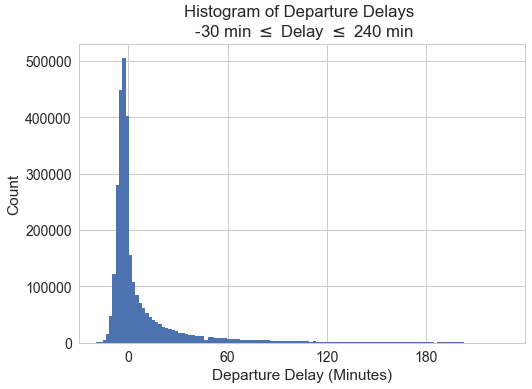

Delays > 240 minutes: 12591
Delays < -30 minutes: 22


In [9]:
# plot a histogram of the delay departures
plt.hist(df.DEP_DELAY, bins=1200)
plt.xlim([-30, 240])
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Count')
plt.title('Histogram of Departure Delays \n -30 min $\leq$ Delay $\leq$ 240 min')
plt.xticks([0, 60, 120, 180])
plt.show()

# print the number of excluded data points
print('Delays > 240 minutes:', np.sum(df.DEP_DELAY > 240))
print('Delays < -30 minutes:', np.sum(df.DEP_DELAY < -30))

The histogram shows a peak at a negative value on the order of a few minutes. The distribution has positive skew, with a tail extending towards larger delay values.  12,591 data points out of the 3 million total had departures more than 4 hours late, while 22 data points had departures more than 30 minutes early.  

## 4. Comparison Between Variables

The distributions of departure delays are compared between airports, and again between airline carriers.  The distributions are compared in each case by using parallel box plots. The plots are shown below.  Outliers are defined with respect to the interquartile range (IQR).  A data point is considered an outlier if it deviates by more than 1.5 times the IQR above the 75th percentile or below the 25th percentile.

In addition to the box plots, descriptive statistics are presented below as supplemental information.  These statistics allow for a quantitative comparison between airports or airlines.

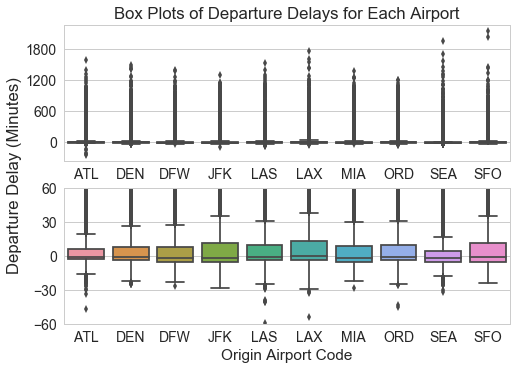

ORIGIN,ATL,DEN,DFW,JFK,LAS,LAX,MIA,ORD,SEA,SFO
count,627033.000000,349505.000000,321382.000000,179342.000000,282321.000000,334308.000000,134841.000000,318640.000000,226108.000000,223654.000000
mean,8.702491,9.549062,10.355011,14.237217,10.262393,12.333067,12.584652,12.771039,5.853477,12.640874
std,34.790519,35.146809,38.196219,49.322517,36.993741,39.210441,46.911783,43.433271,31.452160,42.217650
min,-234.000000,-25.000000,-27.000000,-84.000000,-64.000000,-54.000000,-28.000000,-45.000000,-32.000000,-24.000000
25%,-3.000000,-4.000000,-5.000000,-5.000000,-4.000000,-4.000000,-5.000000,-4.000000,-5.000000,-5.000000
50%,-1.000000,-1.000000,-2.000000,-2.000000,-1.000000,0.000000,-2.000000,-1.000000,-2.000000,-1.000000
75%,6.000000,8.000000,8.000000,11.000000,10.000000,13.000000,9.000000,10.000000,4.000000,11.000000
max,1587.000000,1495.000000,1396.000000,1301.000000,1523.000000,1761.000000,1379.000000,1206.000000,1964.000000,2149.000000


In [10]:
# create boxplots to compare between airports
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
sns.boxplot(x=df.ORIGIN, y=df.DEP_DELAY)
ax_closeup = fig.add_subplot(2,1,2)
sns.boxplot(x=df.ORIGIN, y=df.DEP_DELAY)

# change the y limits for the closeup subplot
ax_closeup.set_ylim([-60, 60])

# change the yticks
ax.set_yticks([0, 600, 1200, 1800])
ax_closeup.set_yticks([-60, -30, 0, 30, 60])

# configure the labels
ax.set_xlabel('')
ax.set_title('Box Plots of Departure Delays for Each Airport')
ax.set_ylabel('')
ax_closeup.set_xlabel('Origin Airport Code')
ax_closeup.set_ylabel('')
fig.text(0.04, 0.5, 'Departure Delay (Minutes)', ha='center', va='center', rotation='vertical')

# display the figure
plt.show()

# compare descriptive statistics between airports
df.groupby('ORIGIN')['DEP_DELAY'].describe().unstack(level=0)

The top plot shows the full distributions for the departure delays.  The values for the first quartiles (Q1), medians (Q2), and third quartiles (Q3) are difficult to distinguish in the top plot, so the bottom plot provides a close up view of the distributions in the region with delays between -60 minutes and 60 minutes.

The descriptive statistics show that the medians range from -2 minutes to 0 minutes.  The values for Q1 and Q3 are all between -5 minutes and 13 minutes inclusive.  The values for Q1 are closer to the medians than the values for Q3.  For each airport, the IQR is relatively small compared to the full range of the distribution, and there are many outliers with large values. The distributions appear to have positive skew.  The plots indicate that the distributions are similar between the airports, but that there are sufficient differences for a comparison.  

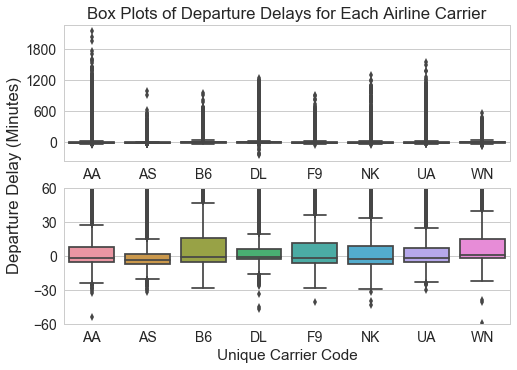

OP_UNIQUE_CARRIER,AA,AS,B6,DL,F9,NK,UA,WN
count,739792.000000,164505.000000,130820.000000,768038.000000,87130.000000,101922.000000,500654.000000,504273.000000
mean,10.905280,3.134829,16.316618,9.191764,13.043452,10.933488,10.824671,12.225541
std,42.540502,24.299102,46.552439,38.887254,45.202808,43.104598,40.610311,29.525506
min,-54.000000,-32.000000,-28.000000,-234.000000,-41.000000,-43.000000,-30.000000,-64.000000
25%,-5.000000,-7.000000,-5.000000,-3.000000,-6.000000,-7.000000,-5.000000,-2.000000
50%,-2.000000,-4.000000,-1.000000,-1.000000,-2.000000,-3.000000,-2.000000,1.000000
75%,8.000000,2.000000,16.000000,6.000000,11.000000,9.000000,7.000000,15.000000
max,2149.000000,994.000000,951.000000,1233.000000,922.000000,1297.000000,1553.000000,570.000000


In [11]:
# create boxplots to compare between airline carriers
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
sns.boxplot(x=df.OP_UNIQUE_CARRIER, y=df.DEP_DELAY)
ax_closeup = fig.add_subplot(2,1,2)
sns.boxplot(x=df.OP_UNIQUE_CARRIER, y=df.DEP_DELAY)

# change the y limits for the closeup subplot
ax_closeup.set_ylim([-60, 60])

# change the yticks
ax.set_yticks([0, 600, 1200, 1800])
ax_closeup.set_yticks([-60, -30, 0, 30, 60])

# configure the labels
ax.set_xlabel('')
ax.set_title('Box Plots of Departure Delays for Each Airline Carrier')
ax.set_ylabel('')
ax_closeup.set_xlabel('Unique Carrier Code')
ax_closeup.set_ylabel('')
fig.text(0.04, 0.5, 'Departure Delay (Minutes)', ha='center', va='center', rotation='vertical')

# display the figure
plt.show()

# compare descriptive statistics between airline carriers
df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].describe().unstack(level=0)

The top plot shows the full distributions for the departure delays.  The values for the first quartiles (Q1), medians (Q2), and third quartiles (Q3) are difficult to distinguish in the top plot, so the bottom plot provides a close up view of the distributions in the region with delays between -60 minutes and 60 minutes.

The descriptive statistics show that the medians range from -4 minutes to 1 minute.  The values for Q1 and Q3 are all between -7 minutes and 16 minutes inclusive.  The values for Q1 are closer to the medians than the values for Q3.  For each airline carrier, the IQR is relatively small compared to the full range of the distribution, and there are many outliers with large values. The distributions appear to have positive skew.  The plots indicate that the distributions are similar between the airline carriers, but that there are sufficient differences for a comparison.  

## 5. Bivariate Distributions

The departure delay distribution is compared against the wind speed distribution.  In order to focus on the relationship between departure delays and weather variables,  observations that have a positive reported value in any of the five delay categories are not included in this portion of the analysis.  A scatterplot of departure delay vs wind speed is displayed below.  Note that wind speeds are reported as integer values in knots, and wind speed sensors typically do not report nonzero wind speeds below 3 knots.  

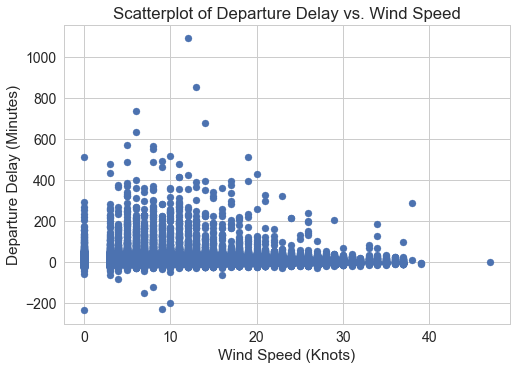

Pearson correlation coefficient = 0.0311951058419


In [12]:
# filter the dataframe to compare delays with weather variables
df_dw = df[((df.CARRIER_DELAY == 0) | df.CARRIER_DELAY.isnull())
          & ((df.WEATHER_DELAY == 0) | df.WEATHER_DELAY.isnull())
          & ((df.NAS_DELAY == 0) | df.NAS_DELAY.isnull())
          & ((df.SECURITY_DELAY == 0) | df.SECURITY_DELAY.isnull())
          & ((df.LATE_AIRCRAFT_DELAY == 0) | df.LATE_AIRCRAFT_DELAY.isnull())]

# make a scatterplot
plt.scatter(df_dw.sknt[df_dw.sknt.notnull()], df_dw.DEP_DELAY[df_dw.sknt.notnull()])
plt.xlabel('Wind Speed (Knots)')
plt.ylabel('Departure Delay (Minutes)')
plt.title('Scatterplot of Departure Delay vs. Wind Speed')
plt.show()

# print the correlation coefficient
pcc = np.corrcoef(df_dw.sknt[df_dw.sknt.notnull()], df_dw.DEP_DELAY[df_dw.sknt.notnull()])[0,1]
print('Pearson correlation coefficient =', pcc)

The scatterplot contains many overlapping data points.  It is difficult to distinguish trends visually, but some observations can be made.  Smaller wind speeds have more instances of extreme departure delays than larger wind speeds.  These extreme data points may be investigated further in later analysis, to determine whether there is a cause of the large delay other than wind speed.  The Pearson correlation coefficient shows a very weak positive correlation between wind speed and departure delay.  

Many data points appear to be clustered close to 0 minutes for all wind speeds.  A heatmap is created for departure delays between -30 minutes and 30 minutes inclusive, in order to visualize the trends in this region more closely. 

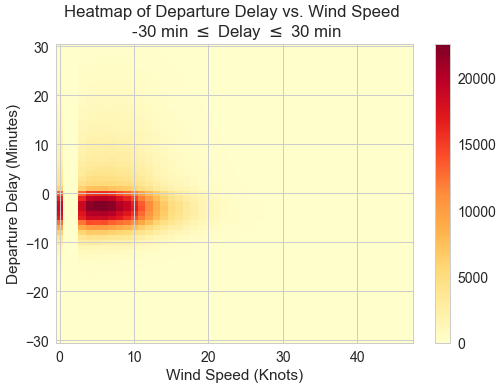

In [13]:
# filter delay region
df_dw_h2d = df_dw[(np.absolute(df_dw.DEP_DELAY) <= 30) & df_dw.sknt.notnull()]

wind = df_dw_h2d.sknt
delay = df_dw_h2d.DEP_DELAY

# create the 2d histogram.  integer knot bin width
w_bins = np.arange(0, wind.max() + 2) - 0.5
d_bins = np.linspace(-30, 31, 62) - 0.5
plt.hist2d(wind, delay, bins=[w_bins, d_bins], cmap='YlOrRd')
plt.xlabel('Wind Speed (Knots)')
plt.ylabel('Departure Delay (Minutes)')
plt.title('Heatmap of Departure Delay vs. Wind Speed \n -30 min $\leq$ Delay $\leq$ 30 min')
plt.colorbar()
plt.show()

The heatmap shows more detail about where the data points are concentrated.  The heatmap indicates that there is a high density of data points with early departures at low wind speeds up to about 15 knots. 

Further analysis will be performed in later stages of the project to explore the relationship between departure delay and wind speed in greater detail.  Further analysis will also examine the relationship between departure delay and other weather variables, such as visibility and temperature. 

## 6. Temporal Trends

The trends in departure delays over time are displayed in the timeseries plot below.  The daily mean and daily median departure delays are plotted over the entire timeframe for the years 2016 and 2017.  Departure delays for all airports and airline carriers are included in the daily means and medians.  

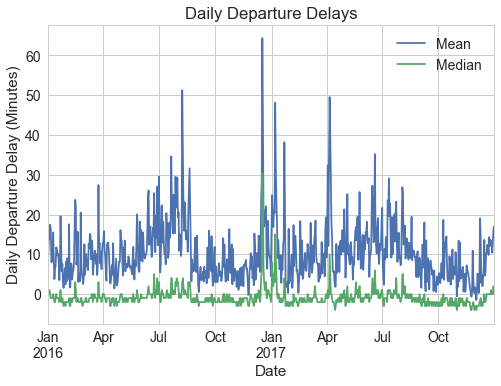

In [14]:
# make a smaller dataframe
df_ts = df[['crs_dep_ts','DEP_DELAY']]
df_ts = df_ts.set_index('crs_dep_ts')

# resample to get daily means and medians
rs_means_medians = df_ts.resample('D').agg([np.nanmean,np.nanmedian])

# plot the timeseries of daily means
rs_means_medians.plot(legend=False, title='Daily Departure Delays')
plt.xlabel('Date')
plt.ylabel('Daily Departure Delay (Minutes)')
plt.legend(['Mean','Median'])
plt.show()

The timeseries plot indicates that daily mean departure delays are typically larger than daily median departure delays.  This suggests that the daily distributions of departure delays typically have positive skew. The plot also shows long scale seasonal variation as well as small scale fluctuations.  The delays tend to be larger in the summer months and smaller in the winter months, with the exception of a few days in late 2016 and early 2017.  The mean is more sensitive to extreme outliers than the median, and so the variations in the median over time are milder than for the mean.  

## 7. Summary

This analysis indicates that each airport has a similar distribution of departure delays.  The distributions are similar for each airline carrier as well.  While there are many similarities in each case, future analyis may examine the differences in more detail.  In particular, the analysis may identify the airport and airline carrier with the worst performance in terms of delays.  The analysis could explore the worst performers in more detail, in order to determine the specific characteristics that are associated with the increased delay durations.

The analysis suggests that many flights depart between up to thirty minutes early and up to four hours late.  A majority of the flights depart within 10 minutes of the scheduled departure time. Later analysis may isolate and explore this region in more detail.  The analysis may investigate whether a small delay on the order of minutes will have practical significance for the efficiency of operations at the airports.  

The distribution of departure delays shows positive skew, with a tail extending towards larger delays. There are many departures with delays longer than 1 hour, with a maximum delay close to 36 hours.  These large delays may have considerable practical significance, and they will be explored in more detail in later analysis.  The analysis may investigate what conditions are associated with lengthy delays, and how often these large delays occur.  

This analysis indicates a very weak correlation between wind speed and departure delay.  It is anticipated that departure delays have complicated relationships with the weather variables, and so considerable analysis will be devoted towards exploring these relationships.  Later analysis may sequentially isolate and explore the relationship between departure delays and each individual weather variable, while keeping the remaining variables fixed under various configurations.  The analysis may also include a multivariate regression that involves many weather variables simultaneously.  Inferential statistics may explore the hypotheses that certain weather variables, or combinations of variables, are correlated with departure delays.

This analysis shows the trends in the departure delays over the years 2016 and 2017.  The daily departure delay means and medians show small scale fluctuations and large scale seasonal trends.  Later analysis may explore and quantify these variations in more detail. Later analysis may also explore other temporal trends in the data, such as the relationship between departure delay and the local time of day.  

## 8. Data Story -- Narrative

The full analysis will explore trends in the departure delays for the busiest U.S. airports and the largest U.S. airline carriers.  There are many directions the analysis could take, and many possible questions to pursue. The scope of the final analysis will depend on the findings during the Exploratory Data Analysis (EDA) as well as time constraints. 

The full distribution of departure delays will be examined in detail.  In addition, individual distributions will be compared between airports and between airline carriers.  EDA will determine which values for departure delays have the most practical significance, and these regions will be investigated more closely.  EDA will also investigate trends of the departure delays over time. Both long and short term trends may be identified and quantified.  Other temporal trends will likely be explored as well, such as the distribution of delays with respect to time of day.  

The primary focus of the analysis is to determine the relationship between departure delays and weather variables. It is likely that the relationship between departure delays and each individual weather variable will be explored sequentially.  In each case, the other variables will be held fixed under certain conditions in order to best isolate the variation in delays with respect to the chosen weather variable.  It is also likely that a multiple regression will be performed, to determine the combined effects of multiple weather variables on departure delays.  This portion of the analysis will likely include inferential statistics to determine whether the correlations between variables are statistically significant, and to test the validity of the regression models.  

The overal goal of the analysis is to provide a comprehensive narrative of trends in the distribution of departure delays, as well as a description of the most significant weather variables and their relationships with departure delays. If time permits, the analysis will identify the airport and airline carrier with the worst performance in terms of delays.  The analysis would then investigate the factors that contribute to the increased delays for the worst performers.